In [ ]:
#pip install numpy
#pip install seaborn
#pip install panda
#pip install matplotlib
#pip install scikit-learn
#pip install plotly
#pip install print_function

In [1]:
# Importing the libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

#adds compatibility with new versions of Python
from __future__  import print_function 
%matplotlib inline 

#it needs to have two underscore for 'future', if not it thorws an error: 
#ModuleNotFoundError: No module named '_future_'

import warnings
warnings.filterwarnings("ignore") #This command ignores the warning 


Intro

- EDA to be done using and merging the first 5 datasets, needs to be cleaned, wrangled and adjusted accordingly. 
- Some of the datasets are for trends and whether or not features influence reviews that influence occupancy that generates higher ROI. 
- The dataset for ML is the last one, it is a sample data of Dublin, we want to identify the occupancy rate in the future. 

Data Analysis and Cleaning 

- Dataset 1: Listing

In [2]:
#Importing the dataset #1
#The dataset chosen for this project is listings for Airbnb 
listing = pd.read_csv('listings.csv')

In [3]:
#View dataset head and tail
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,65,3,227,2020-03-06,1.74,3,233,0,NaN
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.29885,-6.31850,Private room,30,1,1,2019-05-11,0.03,1,99,0,NaN
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,61,3,182,2020-03-09,1.42,3,323,0,NaN
3,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,40,2,316,2021-12-05,2.67,3,324,5,NaN
4,162809,5.5 miles south of Dublin City :^),777681,Robert,NaN,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room,65,1,288,2021-10-19,3.62,2,114,4,NaN


In [ ]:
listing.tail()

In [4]:
listing.shape

(6977, 18)

In [ ]:
listing.info()

In [5]:
#Print quick summary of the dataset statistics
listing.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.977000e+03,6.977000e+03,0.0,6977.000000,6977.000000,6.977000e+03,6977.000000,6977.000000,5527.000000,6977.000000,6977.000000,6977.000000,0.0
mean,2.659650e+07,1.023079e+08,NaN,53.345333,-6.255625,3.019986e+02,8.927189,30.272753,0.963123,7.251971,65.408772,2.958005,NaN
std,1.426913e+07,1.005189e+08,NaN,0.044036,0.057919,1.405164e+04,42.118071,59.819724,2.070010,25.062374,114.209065,11.218871,NaN
min,4.407700e+04,4.398400e+04,NaN,53.205780,-6.488790,9.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.529708e+07,2.441876e+07,NaN,53.330220,-6.278780,5.500000e+01,1.000000,1.000000,0.100000,1.000000,0.000000,0.000000,NaN
50%,2.450335e+07,6.504127e+07,NaN,53.343990,-6.260634,8.500000e+01,2.000000,6.000000,0.390000,1.000000,0.000000,0.000000,NaN
75%,3.711744e+07,1.534091e+08,NaN,53.356460,-6.235200,1.480000e+02,4.000000,29.000000,1.190000,3.000000,78.000000,1.000000,NaN
max,5.372030e+07,4.349262e+08,NaN,53.623490,-6.052910,1.173721e+06,1125.000000,648.000000,81.060000,162.000000,365.000000,366.000000,NaN


In [6]:
#Check for null values
listing.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                            9
neighbourhood_group               6977
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1450
reviews_per_month                 1450
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           6977
dtype: int64

In [7]:
#Replacing all NaN values with 0
listing.fillna({'license':0}, inplace=True)
listing.fillna({'description':0}, inplace=True)
listing.fillna({'reviews_per_month':0}, inplace=True)
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,65,3,227,2020-03-06,1.74,3,233,0,0.0
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.29885,-6.31850,Private room,30,1,1,2019-05-11,0.03,1,99,0,0.0
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,61,3,182,2020-03-09,1.42,3,323,0,0.0
3,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,40,2,316,2021-12-05,2.67,3,324,5,0.0
4,162809,5.5 miles south of Dublin City :^),777681,Robert,NaN,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room,65,1,288,2021-10-19,3.62,2,114,4,0.0


In [8]:
listing.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                            9
neighbourhood_group               6977
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1450
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                              0
dtype: int64

In [ ]:
# Drop the data that are not of interest and/or causing privacy issues
listing.drop(['id','name','host_name','last_review'], axis=1, inplace=True)
# Visualize the first 5 rows
listing.head()

In [ ]:
# Set up color blind friendly color palette
# The palette with grey:
cbPalette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
# The palette with black:
cbbPalette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# sns.palplot(sns.color_palette(cbPalette))
# sns.palplot(sns.color_palette(cbbPalette))

sns.set_palette(cbPalette)
#sns.set_palette(cbbPalette)

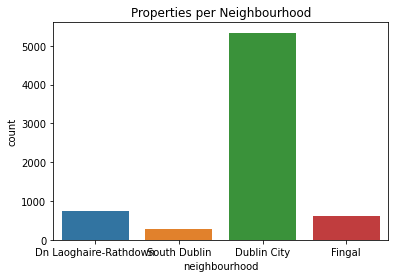

In [9]:
title = 'Properties per Neighbourhood'
sns.countplot(listing['neighbourhood'])
plt.title(title)
plt.ioff()

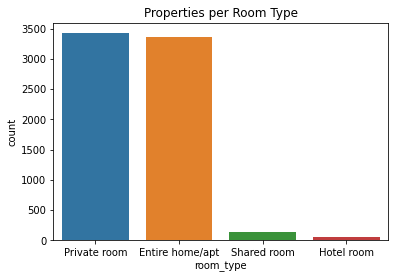

In [10]:
title = 'Properties per Room Type'
sns.countplot(listing['room_type'])
plt.title(title)
plt.ioff()

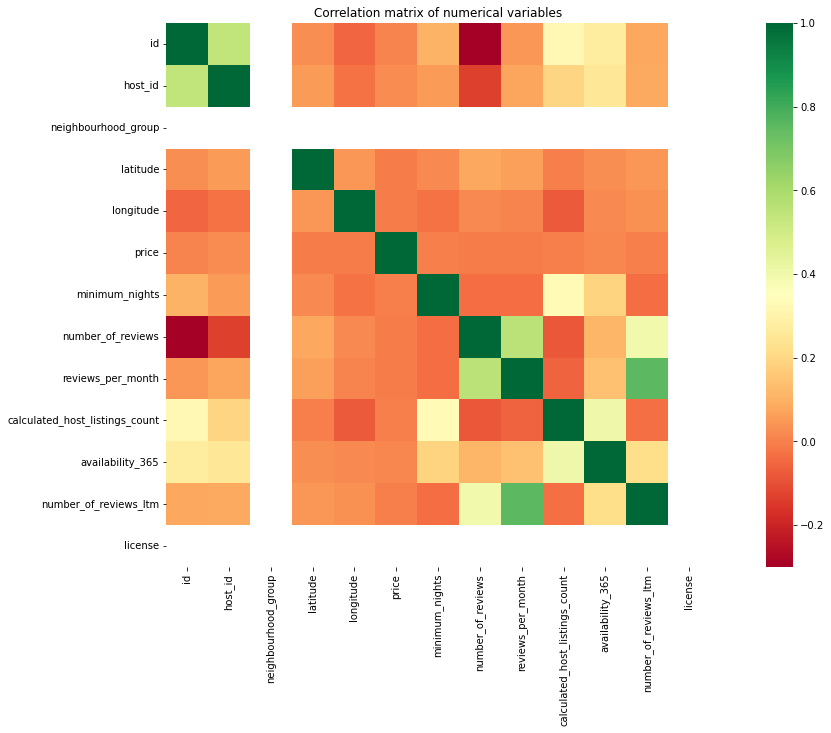

In [11]:
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(listing.corr(), square=True, cmap='RdYlGn')
plt.title(title)
plt.ioff()

In [14]:
#Find correlations
corr = listing.corr()

Strong Correlations were found between:
- the number_of_reviews_ltm and reviews_per_month columns (0.75)
- the number_of_reviews and reviews_per_month

In [15]:
corr.style.background_gradient(cmap = 'coolwarm')

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,1.000000,0.539655,nan,0.029801,-0.054949,0.010037,0.105664,-0.299336,0.045397,0.320407,0.271723,0.080743,nan
host_id,0.539655,1.000000,nan,0.052056,-0.029563,0.021418,0.054179,-0.134993,0.072337,0.195135,0.252859,0.082361,nan
neighbourhood_group,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
latitude,0.029801,0.052056,nan,1.000000,0.045786,-0.007669,0.016385,0.077781,0.065755,-0.001351,0.029604,0.043933,nan
longitude,-0.054949,-0.029563,nan,0.045786,1.000000,-0.009332,-0.028415,0.016047,0.005845,-0.078082,0.017012,0.032330,nan
price,0.010037,0.021418,nan,-0.007669,-0.009332,1.000000,-0.001752,-0.006823,-0.005471,-0.001997,0.012670,-0.003552,nan
minimum_nights,0.105664,0.054179,nan,0.016385,-0.028415,-0.001752,1.000000,-0.037423,-0.040098,0.327427,0.191020,-0.036398,nan
number_of_reviews,-0.299336,-0.134993,nan,0.077781,0.016047,-0.006823,-0.037423,1.000000,0.557266,-0.082199,0.108348,0.401044,nan
reviews_per_month,0.045397,0.072337,nan,0.065755,0.005845,-0.005471,-0.040098,0.557266,1.000000,-0.056838,0.140377,0.753012,nan
calculated_host_listings_count,0.320407,0.195135,nan,-0.001351,-0.078082,-0.001997,0.327427,-0.082199,-0.056838,1.000000,0.404891,-0.031182,nan


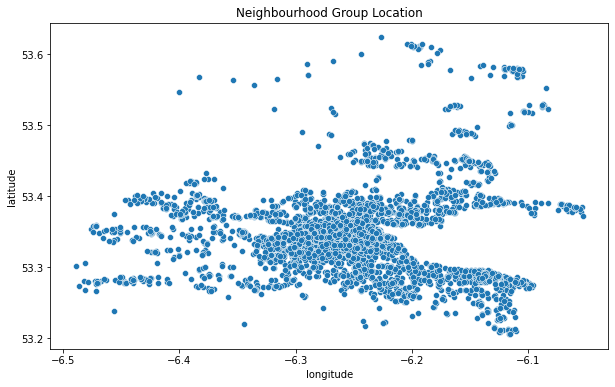

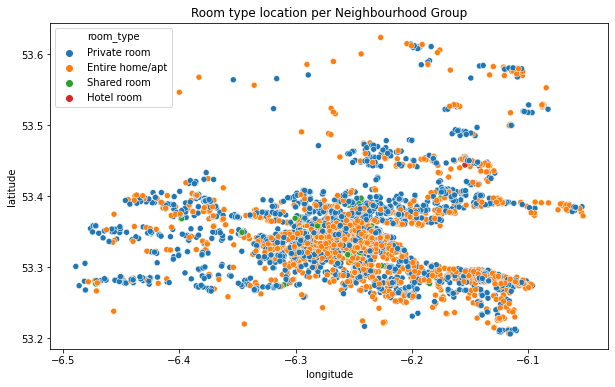

In [12]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(listing.longitude,listing.latitude,hue=listing.neighbourhood_group).set_title(title)
plt.ioff()

title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(listing.longitude,listing.latitude,hue=listing.room_type).set_title(title)
plt.ioff()

- Dataset 2: Review

In [ ]:
#Importing the dataset #2
#The dataset chosen for this project is reviews for Airbnb 
review = pd.read_csv('reviews.csv')

In [ ]:
#View dataset head and tail
review.head()

In [ ]:
review.tail()

In [ ]:
review.shape

In [ ]:
review.info()

In [ ]:
#Print quick summary of the dataset statistics
review.describe()

In [ ]:
#Check for null values
review.isnull().sum()

In [ ]:
#Replacing all NaN values with 0
review.fillna({'comments':0}, inplace=True)

In [ ]:
#Check for null values
review.isnull().sum()

In [ ]:
#Examine the dataset
#(review[['Star Rating', 'o']]
# .describe())

In [ ]:
review['date'].value_counts()

In [ ]:
review.groupby('listing_id')['date'].value_counts()

- Dataset 3: Calendar

In [ ]:
#Importing the dataset # 3
#The dataset chosen for this project is calendar for Airbnb
calendar = pd.read_csv('calendar.csv')

In [ ]:
# Muhammad to add his code here

- Dataset 4: airbnb-listing

In [ ]:
#Importing the dataset # 4
#The dataset chosen for this project is the Dublin listings from OpenData 
airbnb_listing = pd.read_csv('airbnb-listings.csv', sep=";")

#Muhammad to add his code here

- Dataset 5: airbnb-opendata

In [ ]:
#Importing the dataset # 5
#The dataset chosen for this project is Dublin listings from OpenData 
airbnb_listing1 = pd.read_csv('airbnb-opendata.csv', sep=";")

#Muhammad to add his code here

- Dataset 6: Rate

In [17]:
#Importing the dataset # 6
#The dataset chosen for this project is Dublin rate from Airbtics 
rate = pd.read_csv('rate.csv')

#This dataset is a sample, however it contains a lot of information that can be used for this project.

In [ ]:
rate.head()

In [ ]:
rate.tail()

In [20]:
#Based on the information on the dataset itself, the following column names were added. 
rate.columns = [
    "Listing URL", "Property Type", "Latitude", "Longitude", "Star Rating", "Number of Active Days",
    "Bedrooms", "Has pool", "Cleaning Fee", "Extra Guest Fee", "Daily Rate (2020-11)", "Daily Rate (2020-12)",
    "Daily Rate (2021-01)", "Daily Rate (2021-02)", "Daily Rate (2021-03)", "Daily Rate (2021-04)",
    "Daily Rate (2021-05)", "Daily Rate (2021-06)", "Daily Rate (2021-07)", "Daily Rate (2021-08)", "Daily Rate (2021-09)",
    "Daily Rate (2021-10)", "Occupancy Rate (2020-11)", "Occupancy Rate (2020-12)", "Occupancy Rate (2021-01)",
    "Occupancy Rate (2021-02)", "Occupancy Rate (2021-03)", "Occupancy Rate (2021-04)", "Occupancy Rate (2021-05)",
    "Occupancy Rate (2021-06)", "Occupancy Rate (2021-07)", "Occupancy Rate (2021-08)", "Occupancy Rate (2021-09)",
    "Occupancy Rate (2021-10)", "Revenue (2020-11)", "Revenue (2020-12)", "Revenue (2021-01)", "Revenue (2021-02)",
    "Revenue (2021-03)", "Revenue (2021-04)", "Revenue (2021-05)", "Revenue (2021-06)", "Revenue (2021-07)",
    "Revenue (2021-08)", "Revenue (2021-09)", "Revenue (2021-10)",
]

In [21]:
#Drop the two first rows.
rate.drop(index=rate.index[0:2], 
        axis=0, 
        inplace=True)

In [22]:
rate.head()

,Listing URL,Property Type,Latitude,Longitude,Star Rating,Number of Active Days,Bedrooms,Has pool,Cleaning Fee,Extra Guest Fee,...,Revenue (2021-01),Revenue (2021-02),Revenue (2021-03),Revenue (2021-04),Revenue (2021-05),Revenue (2021-06),Revenue (2021-07),Revenue (2021-08),Revenue (2021-09),Revenue (2021-10)
2,http://airbnb.com/rooms/47311,entire_home,50.81523,-0.10806,4.3,274,1,f,37,0,...,62,1069,1588,2076,2636,3237,3206,0,0,0
3,http://airbnb.com/rooms/74819,Entire Home,50.82145,-0.14257,4.9,243,3,f,52,0,...,7078,0,0,15587,0,0,15521,15622,13314,11036
4,http://airbnb.com/rooms/76190,entire_home,50.82369,-0.15587,4.5,365,3,f,63,5.04667,...,5920,833,2495,5881,7672,9570,9927,10492,6317,2113
5,http://airbnb.com/rooms/98654,entire_home,50.82094,-0.12963,4.5,365,2,f,80,4.94667,...,2283,2283,2283,2283,2283,2283,2283,2283,2283,2283
6,http://airbnb.com/rooms/146850,condo,50.82178,-0.12914,4.8,274,1,f,0,0,...,819,0,0,1067,960,0,1067,1046,974,1005


In [ ]:
#Examine the dataset
(rate[['Star Rating', 'Number of Active Days', 'Daily Rate (2020-12)', 'Occupancy Rate (2020-12)',
       'Revenue (2020-12)']]
 .describe())

In [ ]:
rate.info()

In [ ]:
#View number of null values
rate.isnull().sum()

In [ ]:
#Replace all NaN values with 0
rate.fillna({'Cleaning Fee':0}, inplace=True)
rate.fillna({'Extra Guest Fee':0}, inplace=True)

In [ ]:
#Check null values again
rate.isnull().sum()

In [18]:
#sns.displot(rate, x="")
#rate this by a predominant variable

ValueError: Could not interpret value `` for parameter `x`

In [ ]:
#Find correlations between data
corr = rate.corr()

In [ ]:
corr.style.background_gradient(cmap = 'coolwarm')

In [ ]:
#Correlations - example 

rate.corr() # Whole correlation matrix
rate.corr()['revenue_mean'] # Check correlations with outcome only
sns.heatmap(rate.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [ ]:
#Correlations - example 

rate.corr() # Whole correlation matrix
rate.corr()['daily_rate_mean'] # Check correlations with outcome only
sns.heatmap(rate.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [ ]:
#Correlations - example 

rate.corr() # Whole correlation matrix
rate.corr()['occupancy_mean'] # Check correlations with outcome only
sns.heatmap(rate.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

Data Preparation

In [ ]:
# Import packages
import pandas as pd
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import lars_path
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score
import scipy.stats as stats
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

- Listing Dataset

In [ ]:
(listing[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]
 .describe())

In [ ]:
listing = listing.loc[listing['price'] > 0]

In [ ]:
listing.describe()

In [ ]:
# Recode data as categorical
# https://datascience.stackexchange.com/questions/29093/continuous-variable-to-categorical-by-quartiles
listing_encoded = listing.copy()
listing_encoded['minimum_nights'] = pd.qcut(listing['minimum_nights'], q=2, labels=["minimum_nights_low", "minimum_nights_high"])
listing_encoded['number_of_reviews'] = pd.qcut(listing['number_of_reviews'], q=3, labels=["number_of_reviews_low", "minimum_nights_medium", "number_of_reviews_high"])
listing_encoded['reviews_per_month'] = pd.qcut(listing['reviews_per_month'], q=2, labels=["reviews_per_month_low", "reviews_per_month_high"])
listing_encoded['calculated_host_listings_count'] = pd.cut(listing['calculated_host_listings_count'], 
                                                bins=[0, 2, 327],
                                                labels=["calculated_host_listings_count_low", "calculated_host_listings_count_high"])

#NEEDS TO BE FIXED
#listing_encoded['availability_365'] = pd.qcut(listing['availability_365'], q=2, labels=["availability_low", "availability_high"])


In [ ]:
listing_encoded.isnull().sum()

In [ ]:
sns.set_palette("muted")
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.distplot(listing['price'])

subplot(2,3,2)
sns.distplot(listing['minimum_nights'])

subplot(2,3,3)
sns.distplot(listing['number_of_reviews'])

subplot(2,3,4)
sns.distplot(listing['reviews_per_month'])

subplot(2,3,5)
sns.distplot(listing['calculated_host_listings_count'])

subplot(2,3,6)
sns.distplot(listing['availability_365'])

plt.tight_layout() # avoid overlap of plotsplt.draw()

In [ ]:
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.boxplot(y = listing['price']) 

subplot(2,3,2)
sns.boxplot(y = listing['minimum_nights'])

subplot(2,3,3)
sns.boxplot(y = listing['number_of_reviews'])

subplot(2,3,4)
sns.boxplot(y = listing['reviews_per_month'])

subplot(2,3,5)
sns.boxplot(y = listing['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(y = listing['availability_365'])

plt.tight_layout() # avoid overlap of plots
plt.draw()

- Rate Dataset

In [ ]:
sns.distplot(rate['daily_rate_mean'], kde=True,);
fig = plt.figure()
res = stats.probplot(rate['daily_rate_mean'], plot=plt)
print("Skewness: %f" % rate['daily_rate_mean'].skew())
print("Kurtosis: %f" % rate['daily_rate_mean'].kurt())

#This needs to be reviewed as the dataset looks skewed 

In [ ]:
#Separating the dataset into categorical and numeric

categorical_col = ['Listing URL','Property Type', 'Has pool']

numeric_col = ['Latitude', 
               'Longitude', 
               'Star Rating', 
               'Number of Active Days', 
               'Bedrooms', 
               'Cleaning Fee', 
               'Extra Guest Fee',            
               'Daily Rate (2020-11)',         
               'Daily Rate (2020-12)',
               'Daily Rate (2021-01)',
               'Daily Rate (2021-02)',        
               'Daily Rate (2021-03)',       
                'Daily Rate (2021-04)',        
                'Daily Rate (2021-05)',        
                'Daily Rate (2021-06)',        
                'Daily Rate (2021-07)',        
                'Daily Rate (2021-08)',        
                'Daily Rate (2021-09)',        
                'Daily Rate (2021-10)',        
                'Occupancy Rate (2020-11)',    
                'Occupancy Rate (2020-12)',   
                'Occupancy Rate (2021-01)',    
                'Occupancy Rate (2021-02)',    
                'Occupancy Rate (2021-03)',    
                'Occupancy Rate (2021-04)',    
                'Occupancy Rate (2021-05)',    
                'Occupancy Rate (2021-06)',    
                'Occupancy Rate (2021-07)',    
                'Occupancy Rate (2021-08)',    
                'Occupancy Rate (2021-09)',    
                'Occupancy Rate (2021-10)',   
                'Revenue (2020-11)',           
                'Revenue (2020-12)',         
                'Revenue (2021-01)',           
                'Revenue (2021-02)',           
                'Revenue (2021-03)',           
                'Revenue (2021-04)',           
                'Revenue (2021-05)',           
                'Revenue (2021-06)',           
                'Revenue (2021-07)',           
                'Revenue (2021-08)',           
                'Revenue (2021-09)',           
                'Revenue (2021-10)',
              ]

#Change the object type to float64 later on

In [ ]:
print(numeric_col)

In [ ]:
rate[numeric_col] = rate[numeric_col].apply(pd.to_numeric, errors='coerce')

In [ ]:
rate.info()

In [ ]:
#NOT NEEDED - things I tried.
#encoding the dataset so that I can add columns for the rates values. 
#rate['Cleaning Fee'] = rate['Cleaning Fee'].astype(float)

In [ ]:
rate.drop(columns=['Listing URL', 'Property Type', 'Latitude', 'Longitude', 'Has pool'])

In [ ]:
#Check mean for all the Revenue columns, Occupancy and Daily Rate

rate['daily_rate_mean'] = rate[['Daily Rate (2021-01)','Daily Rate (2021-02)', 'Daily Rate (2021-03)','Daily Rate (2021-04)', 'Daily Rate (2021-05)','Daily Rate (2021-06)', 'Daily Rate (2021-07)','Daily Rate (2021-08)', 'Daily Rate (2021-09)','Daily Rate (2021-10)', 'Daily Rate (2020-11)','Daily Rate (2020-12)']].mean(axis=1)

rate['revenue_mean'] = rate[['Revenue (2020-11)','Revenue (2020-12)','Revenue (2021-01)','Revenue (2021-02)','Revenue (2021-03)','Revenue (2021-04)',          'Revenue (2021-05)','Revenue (2021-06)','Revenue (2021-07)','Revenue (2021-08)','Revenue (2021-09)','Revenue (2021-10)']].mean(axis=1)

rate['occupancy_mean'] = rate[['Occupancy Rate (2020-11)','Occupancy Rate (2020-12)','Occupancy Rate (2021-01)','Occupancy Rate (2021-02)','Occupancy Rate (2021-03)','Occupancy Rate (2021-04)','Occupancy Rate (2021-05)','Occupancy Rate (2021-06)','Occupancy Rate (2021-07)','Occupancy Rate (2021-08)','Occupancy Rate (2021-09)','Occupancy Rate (2021-10)']].mean(axis=1)


In [ ]:
rate = rate.drop(['Daily Rate (2021-01)','Daily Rate (2021-02)', 'Daily Rate (2021-03)','Daily Rate (2021-04)', 'Daily Rate (2021-05)','Daily Rate (2021-06)', 'Daily Rate (2021-07)','Daily Rate (2021-08)', 'Daily Rate (2021-09)','Daily Rate (2021-10)', 'Daily Rate (2020-11)','Daily Rate (2020-12)','Revenue (2020-11)','Revenue (2020-12)','Revenue (2021-01)','Revenue (2021-02)','Revenue (2021-03)','Revenue (2021-04)','Revenue (2021-05)','Revenue (2021-06)','Revenue (2021-07)','Revenue (2021-08)','Revenue (2021-09)','Revenue (2021-10)','Occupancy Rate (2020-11)','Occupancy Rate (2020-12)','Occupancy Rate (2021-01)','Occupancy Rate (2021-02)','Occupancy Rate (2021-03)','Occupancy Rate (2021-04)','Occupancy Rate (2021-05)','Occupancy Rate (2021-06)','Occupancy Rate (2021-07)','Occupancy Rate (2021-08)','Occupancy Rate (2021-09)','Occupancy Rate (2021-10)'], axis=1)

In [ ]:
#del rate['Daily Rate (2021-01)','Daily Rate (2021-02)', 'Daily Rate (2021-03)','Daily Rate (2021-04)', 'Daily Rate (2021-05)','Daily Rate (2021-06)', 'Daily Rate (2021-07)','Daily Rate (2021-08)', 'Daily Rate (2021-09)','Daily Rate (2021-10)', 'Daily Rate (2020-11)','Daily Rate (2020-12)','Revenue (2020-11)','Revenue (2020-12)','Revenue (2021-01)','Revenue (2021-02)','Revenue (2021-03)','Revenue (2021-04)',          'Revenue (2021-05)','Revenue (2021-06)','Revenue (2021-07)','Revenue (2021-08)','Revenue (2021-09)','Revenue (2021-10)','Occupancy Rate (2020-11)','Occupancy Rate (2020-12)','Occupancy Rate (2021-01)','Occupancy Rate (2021-02)','Occupancy Rate (2021-03)','Occupancy Rate (2021-04)','Occupancy Rate (2021-05)','Occupancy Rate (2021-06)','Occupancy Rate (2021-07)','Occupancy Rate (2021-08)','Occupancy Rate (2021-09)','Occupancy Rate (2021-10)']

In [ ]:
rate.head()

In [ ]:
rate.info()

- Reviews Dataset

- Calendar Dataset

- Airbnb-listings Dataset

- Airbnb-opendata Dataset

Predictions

In [ ]:
# Load the Dataset  
#data.drop(['latitude', 'name',], axis=1, inplace=True)
listing.drop(['name'], axis=1, inplace=True)
listing_copy = listing.copy()

In [ ]:
# log10 transform
# https://stackoverflow.com/questions/30794525/adding-one-to-all-the-values-in-a-dataframe
# data_copy = data.copy()
listing.minimum_nights += 0.000000001
listing['minimum_nights'] = np.log10(listing['minimum_nights'])
listing.number_of_reviews += 0.000000001
listing['number_of_reviews'] = np.log10(listing['number_of_reviews'])
listing.reviews_per_month += 0.000000001
listing['reviews_per_month'] = np.log10(listing['reviews_per_month'])
listing.calculated_host_listings_count += 0.000000001
listing['calculated_host_listings_count'] = np.log10(listing['calculated_host_listings_count'])
listing.availability_365 += 0.000000001
listing['availability_365'] = np.log10(listing['availability_365'])

In [ ]:
# Encoding categorical data
listing = pd.get_dummies(listing, columns=['room_type'], drop_first=True)
listing = pd.get_dummies(listing, columns=['neighbourhood'], drop_first=True)
listing = pd.get_dummies(listing, columns=['neighbourhood_group'], drop_first=True)

In [ ]:
# Filter the dataset for prices between 50 and $175
listing_filtered_low = listing.loc[(listing['price'] < 175)]

In [ ]:
# Filter the dataset for prices superior to $175
listing_filtered_high = listing.loc[(listing['price'] > 175)]

In [ ]:
# Split the dataset
X = listing_filtered_low.drop('price', axis=1).values
y = listing_filtered_low['price'].values
y = np.log10(y)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)

In [ ]:
# Compare predicted and actual values
df= pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

In [ ]:
X = listing_filtered_high.drop('price', axis=1).values
y = listing_filtered_high['price'].values
y = np.log10(y)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#trying to get rid of the error when not using this line
#ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#X_test.fillna(X_test.mean())

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)



In [ ]:
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

In [ ]:
#Random Forest Regression

In [ ]:
#https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
#http://insideairbnb.com/ireland/
#https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=ireland
#https://app.airbtics.com/airbnb-data/ireland/0/dublin
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
#https://www.codegrepper.com/code-examples/python/convert+object+to+float64+pandas
#